# **Text Mining -- Midterm TagCloud Project**

**COVID-19 Reporting on China & EU Countries, and Research Papers**


> Team 8




For this midterm project, we wish to compare the differences between news reporting on the **COVID-19 situation** in **China** and **European countries**. 

Also, we collected 14 **research papers on COVID-19** to try to extract what researchers emphasize in this phase of researching.

(i.e. does the means of transmission the most important part of research now or the mechanism the COVID-19 or others?) 

We collected 15 news on reporting COVID-19 situation in the European countries, 31 news on reporting COVID-19 situation in China from CNN.

Most of our sources are collected on **CNN**, so the result in the project may show mainly what the US media sees COVID-19. 



In the end, we will generate **3 tag clouds** based on **feature selection**.

We will also implement **information retrieval** task on these 3 cases based on the query texts we have chosen.

Hopefully, we can gain more insightful understanding on COVID-19 through our project, instead of just gaining information from Taiwanese media sources.

**Downloading Our Data and Query Text:**

> [Selected CNN news for COVID-19 situation in the European countries](https://drive.google.com/drive/folders/1OxXynmoIS91ihAUe5O_DRMYmPimjWxhX?usp=sharing)

> [Selected CNN news for COVID-19 situation in China](https://drive.google.com/drive/folders/1ZZA9RA996UE9e6V4JmDHrSQzBJboBMjI?usp=sharing)

> [Selected research papers for COVID-19](https://drive.google.com/drive/folders/13A6LpJH3wV9fZRbEcyq-7daSw7vi4L52?usp=sharing)

> [Query text for the EU case](https://drive.google.com/file/d/1ImviK4WLAIOzvQO9lVx1XhjMCefqNMsn/view?usp=sharing)

> [Query text for China case](https://drive.google.com/file/d/1f7QcRKBnLkPHTSn-3l0vExmGtRSVOitp/view?usp=sharing)

> [Query text for the research for COVID-19 case](https://drive.google.com/file/d/1BXGZZ04wSd1eFaE1NrbvtuN7V7wE5nU4/view?usp=sharing)


















##**Data Loading & Preprocessing**

We shall implement the same proprocessing process among all 3 cases (China/EU/Research).

First, we load in our dataset as follows:

In [1]:
#Mount google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
mydrive ="/content/drive/My Drive/Colab Notebooks/"
file_path_EU = mydrive +"DATA/"
doc_all_EU={}

file_path_CN = mydrive +"china/"
doc_all_CN={}

file_path_paper = mydrive +"covid_research/"
doc_all_paper={}

After that, we will implement preprocessing process of our text sources among 3 cases as following:



## **(i) NER (Name Entity Recongnition)** 

A "**named entity**" is a real-world object, such as persons, locations, organizations, products, etc., that can be denoted with a proper name. 

**NER** seeks to locate and classify named entities in text into pre-defined categories, such as the names of certain people, organizations, locations, and expressions of times. We can also discover possible multi-word token candidates through this scheme.

For example, "Harry Potter" is considered a term itself, rather than "Harry" and "Potter".



We wish to first extract some meaningful name entity from our text, and perform multi-word tokenization via **MWETokenizer** later on.

Let's see what we can discover from NER via **spacy** package as follows:

We will first load in our required txt files for each 3 cases, use spacy to perform NER task, and print out the top 3 terms for each txt files as follows 
(for research paper case, we will print out the top 5 terms):

### **(1) EU Case**

In [3]:
import os
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
from collections import Counter

for filename in os.listdir(file_path_EU):
  fileExtension = filename.split(".")[-1]
  if fileExtension == "txt": # just read .txt file, in case google drive insert some hidden file which make the error.
    text = open(file_path_EU + filename).read()
    doc = nlp(text)
    
    #display NER for each document:
    #displacy.render(doc, jupyter=True, style='ent')

    A = [(X.text, X.label_) for X in doc.ents]
    #B = [word for word in A if word[1] == "ORG"]
    labels = [X.label_ for X in doc.ents]
    items = [X.text for X in doc.ents]
    print(Counter(A).most_common(3))




[(('Johnson', 'PERSON'), 6), (('Gove', 'PERSON'), 6), (('UK', 'GPE'), 3)]
[(('Mafia', 'ORG'), 22), (('Italy', 'GPE'), 12), (('CNN', 'ORG'), 7)]
[(('Queen Elizabeth II', 'PERSON'), 3), (('Queen', 'PERSON'), 3), (('Saturday', 'DATE'), 2)]
[(('Spain', 'GPE'), 5), (('Madrid', 'GPE'), 3), (('Spanish', 'NORP'), 2)]
[(('Venice', 'GPE'), 6), (('Italy', 'GPE'), 3), (('The European Space Agency', 'ORG'), 2)]
[(('CNN', 'ORG'), 5), (('Team Rubicon', 'ORG'), 4), (('Americans', 'NORP'), 3)]
[(('Taiwan', 'GPE'), 7), (('New Zealand', 'GPE'), 7), (('German', 'NORP'), 5)]
[(('Italy', 'GPE'), 10), (('Italian', 'NORP'), 8), (('CNN', 'ORG'), 6)]
[(('1918', 'DATE'), 14), (('Spanish', 'NORP'), 8), (('US', 'GPE'), 7)]
[(('Taiwan', 'GPE'), 19), (('Germany', 'GPE'), 19), (('first', 'ORDINAL'), 12)]
[(('UK', 'GPE'), 3), (('Titchen', 'PERSON'), 3), (('coronavirus', 'ORG'), 2)]
[(('Macron', 'GPE'), 13), (('France', 'GPE'), 7), (('China', 'GPE'), 5)]
[(('Italy', 'GPE'), 11), (('the United States', 'GPE'), 3), (('th

We can see that we have discovered some terms consisted of 2 or more words. (i.e. possible candidates for multi-tokens)



1.   "**Team Rubicon**" 
2.   "**the United States**" 

1.   "**the University of Pavia San Matteo Hospital**" 
2.   "**The European Space Agency**" 

1.   "**Queen Elizabeth II**"
2.   "**New Zealand**" 



Also, from the second document, we can see that "**Mafia**" appears 22 times. This may be an indication for mafia being influential in this COVID-19 pandemic. 

However, we will not do anything with "Mafia" at this point because "Mafia" will be labelled as "POS = NOUN" in later section. We will implement POS feature selection later on. In this stage, all we need to know is that "Mafia" may play a big role in European society.

Furthermore, looking at the "**1918**", it appears 14 times. By doing tokenization/POS feature selection first and not doing NER first, we may omit this frequently appeared term.

In fact, "1918" was the year which the "Spanish Flu" pandemic began.

We will use "**MWETokenizer**" to perform multi-word tokenizer task in the later part. 



### **(2) China Case**

In [4]:
import os
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
from collections import Counter

for filename in os.listdir(file_path_CN):
  fileExtension = filename.split(".")[-1]
  if fileExtension == "txt": # just read .txt file, in case google drive insert some hidden file which make the error.
    text_CN = open(file_path_CN + filename).read()
    doc_CN = nlp(text_CN)
    
    #display NER for each document:
    #displacy.render(doc, jupyter=True, style='ent')

    A_CN = [(X.text, X.label_) for X in doc_CN.ents]
    #B_CN = [word for word in A_CN if word[1] == "ORG"]
    labels_CN = [X.label_ for X in doc_CN.ents]
    items_CN = [X.text for X in doc_CN.ents]
    print(Counter(A_CN).most_common(3))



[(('Wang', 'PERSON'), 3), (('CNN', 'ORG'), 2), (('Wang', 'ORG'), 2)]
[(('China', 'GPE'), 4), (('US', 'GPE'), 3), (('Sunday', 'DATE'), 2)]
[(('Boeing', 'ORG'), 8), (('New Hampshire', 'GPE'), 4), (('China', 'GPE'), 3)]
[(('Trump', 'PERSON'), 14), (('US', 'GPE'), 7), (('China', 'GPE'), 6)]
[(('US', 'GPE'), 6), (('Monday', 'DATE'), 4), (('CNN', 'ORG'), 2)]
[(('Trump', 'PERSON'), 14), (('CNN', 'ORG'), 6), (('Sunday', 'DATE'), 6)]
[(('UK', 'GPE'), 13), (('Gove', 'PERSON'), 10), (('Johnson', 'PERSON'), 8)]
[(('Northeast', 'LOC'), 2), (('the weekend', 'DATE'), 1), (('Gilead', 'PERSON'), 1)]
[(('Chinese', 'NORP'), 4), (('China', 'GPE'), 3), (('Guangzhou Evergrande', 'PERSON'), 3)]
[(('Trump', 'PERSON'), 6), (('White House', 'ORG'), 6), (('Trump', 'PRODUCT'), 6)]
[(('Trump', 'PERSON'), 9), (('Democrat', 'NORP'), 4), (('Democratic', 'NORP'), 4)]
[(('Trump', 'PERSON'), 9), (('Trump', 'PRODUCT'), 5), (('CNN', 'ORG'), 4)]
[(('China', 'GPE'), 6), (('Trump', 'PERSON'), 4), (('CNN', 'ORG'), 1)]
[(('Chi

We can see that we have discovered some terms consisted of 2 or more words. (i.e. possible candidates for multi-tokens)



1.   "**New Hampshire**" 
2.   "**Guangzhou Evergrande**" 

1.   "**White House**" 
2.   "**Hong Kong**" 

1.   "**David Shortell**" 

We will use "**MWETokenizer**" to perform multi-word tokenizer task in the later part. 

### **(3) Research Paper For COVID-19**

For this case, we will print out the **top 5 terms** for each txt files since top 3 terms provide little information about possible multi-word token candidates.

In [5]:
import os
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
from collections import Counter

for filename in os.listdir(file_path_paper):
  fileExtension = filename.split(".")[-1]
  if fileExtension == "txt": # just read .txt file, in case google drive insert some hidden file which make the error.
    text_paper = open(file_path_paper + filename).read()
    doc_paper = nlp(text_paper)
    
    #display NER for each document:
    #displacy.render(doc, jupyter=True, style='ent')

    A_paper = [(X.text, X.label_) for X in doc_paper.ents]
    #B_paper = [word for word in A_paper if word[1] == "ORG"]
    labels_paper= [X.label_ for X in doc_paper.ents]
    items_paper = [X.text for X in doc_paper.ents]
    print(Counter(A_paper).most_common(5))

[(('Wuhan', 'GPE'), 8), (('China', 'GPE'), 4), (('2019', 'DATE'), 3), (('first', 'ORDINAL'), 3), (('RT-PCR', 'ORG'), 2)]
[(('3', 'CARDINAL'), 3), (('Wuhan', 'GPE'), 2), (('2', 'CARDINAL'), 2), (('60%', 'PERCENT'), 2), (('40', 'CARDINAL'), 2)]
[(('CVD', 'ORG'), 7), (('2', 'CARDINAL'), 4), (('ICU', 'ORG'), 4), (('Wuhan', 'GPE'), 3), (('NHC', 'ORG'), 3)]
[(('China', 'GPE'), 13), (('1', 'CARDINAL'), 8), (('RNA', 'ORG'), 8), (('16', 'CARDINAL'), 8), (('2', 'CARDINAL'), 7)]
[(('5', 'CARDINAL'), 6), (('day 7', 'DATE'), 5), (('days 7–9', 'DATE'), 4), (('influenza', 'ORG'), 4), (('IgG', 'ORG'), 3)]
[(('two', 'CARDINAL'), 12), (('1', 'CARDINAL'), 8), (('CT', 'ORG'), 7), (('2', 'CARDINAL'), 6), (('Hubei Province', 'GPE'), 4)]
[(('DFM', 'ORG'), 4), (('ARDS', 'FAC'), 3), (('HLH', 'ORG'), 3), (('China', 'GPE'), 2), (('anakinra', 'PERSON'), 2)]
[(('Wuhan', 'GPE'), 54), (('1', 'CARDINAL'), 16), (('3', 'CARDINAL'), 14), (('2', 'CARDINAL'), 10), (('China', 'GPE'), 9)]
[(('NK', 'ORG'), 15), (('MD', 'ORG'

We can see that we have discovered some terms consisted of 2 or more words. (i.e. possible candidates for multi-tokens)



1.   "**RT-PCR**" 
2.   "**Hubei Province**" 

1.   "**NKG2A+**" 
2.   "**SARS-CoV**" 



We will use "**MWETokenizer**" to perform multi-word tokenizer task in the later part. 

## **(ii) Tokenization/Stopwords Removal/POS Tagging**

Next, for each 3 cases (News for EU, News for China, Researches on COVID-19), we will perform tokenization (via "**MWETokenizer**")  and stopwords removal. 

After that, we will use "**POS Tagging**" (**POS == "NOUN" and POS == "ADJ**) to perform **feature selection**.

In [6]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

### **(1) EU Case**

In [7]:
import nltk,os
nltk.download('punkt')

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
nltk.download('universal_tagset')

from nltk.tokenize import MWETokenizer
mw_tokenizer = nltk.tokenize.MWETokenizer()

# For EU reports, do preprocessing
for filename in os.listdir(file_path_EU):
  fileExtension = filename.split(".")[-1]
  if fileExtension == "txt": # just read .txt file, in case google drive insert some hidden file which make the error.
    text = open(file_path_EU+filename).read()
    tokens = nltk.word_tokenize(text) 
    
    
    mw_tokenizer.add_mwe(('Team', 'Rubicon'))
    mw_tokenizer.add_mwe(('the', 'United', 'States'))
    mw_tokenizer.add_mwe(('the', 'University', 'of', 'Pavia', 'San', 'Matteo', 'Hospital'))
    mw_tokenizer.add_mwe(('The', 'European', 'Space', 'Agency'))
    mw_tokenizer.add_mwe(('Queen', 'Elizabeth', 'II'))
    mw_tokenizer.add_mwe(('New', 'Zealand'))
    MW_EU = mw_tokenizer.tokenize(tokens)
   
    
    token_filtered = [w.lower() for w in MW_EU if w.isalpha()]


    tokens1 = [word for word in MW_EU if not word in stopwords]
    pos_tokens_uni = nltk.pos_tag(tokens1,tagset='universal')
    adj = [word for word in pos_tokens_uni if word[1] == "ADJ"]
    n = [word for word in pos_tokens_uni if word[1] == "NOUN"]
    v = [word for word in pos_tokens_uni if word[1] == "VERB"]
    adj_used_EU = [x[0] for x in adj]
    n_used_EU = [x[0] for x in n]
    v_used_EU = [x[0] for x in v]
    doc_all_EU[filename[:-4]]= adj_used_EU + n_used_EU

text_EU = ' '.join(adj_used_EU + n_used_EU)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


### **(2) China Case**

In [0]:
# For China reports, do preprocessing
for filename in os.listdir(file_path_CN):
  fileExtension = filename.split(".")[-1]
  if fileExtension == "txt": # just read .txt file, in case google drive insert some hidden file which make the error.
    text_CN = open(file_path_CN+filename).read()
    tokens_CN = nltk.word_tokenize(text_CN)


    mw_tokenizer.add_mwe(('New', 'Hampshire'))
    mw_tokenizer.add_mwe(('Guangzhou', 'Evergrande'))
    mw_tokenizer.add_mwe(('White', 'House'))
    mw_tokenizer.add_mwe(('Hong', 'Kong'))
    mw_tokenizer.add_mwe(('David', 'Shortell'))
   
    MW_CN = mw_tokenizer.tokenize(tokens_CN)
    

    token_filtered_CN = [w.lower() for w in MW_CN if w.isalpha()]
    tokens1_CN = [word for word in token_filtered_CN if not word in stopwords]
    pos_tokens_uni_CN = nltk.pos_tag(tokens1_CN ,tagset='universal')
    adj_CN = [word for word in pos_tokens_uni_CN if word[1] == "ADJ"]
    n_CN = [word for word in pos_tokens_uni_CN if word[1] == "NOUN"]
    v_CN = [word for word in pos_tokens_uni_CN if word[1] == "VERB"]
    adj_used_CN = [x[0] for x in adj_CN]
    n_used_CN = [x[0] for x in n_CN]
    v_used_CN = [x[0] for x in v_CN]
    doc_all_CN[filename[:-4]]= adj_used_CN + n_used_CN

text_CN_new = ' '.join(adj_used_CN + n_used_CN)



### **(3) Research Paper For COVID-19**

In [0]:
# For Researches on COVID-19, do preprocessing
for filename in os.listdir(file_path_paper):
  fileExtension = filename.split(".")[-1]
  if fileExtension == "txt": # just read .txt file, in case google drive insert some hidden file which make the error.
    text_p = open(file_path_paper+filename).read()
    tokens_p = nltk.word_tokenize(text_p)

    
    mw_tokenizer.add_mwe(('RT', '-', 'PCR'))
    mw_tokenizer.add_mwe(('Hubei', 'Province'))
    mw_tokenizer.add_mwe(('NKG2A', '+'))
    mw_tokenizer.add_mwe(('SARS', '-', 'CoV'))
    
   
    MW_p = mw_tokenizer.tokenize(tokens_p)
    




    token_filtered_p = [w.lower() for w in MW_p if w.isalpha()]
    tokens1_p = [word for word in token_filtered_p if not word in stopwords]
    pos_tokens_uni_p = nltk.pos_tag(tokens1_p ,tagset='universal')
    adj_p = [word for word in pos_tokens_uni_p if word[1] == "ADJ"]
    n_p = [word for word in pos_tokens_uni_p if word[1] == "NOUN"]
    v_p = [word for word in pos_tokens_uni_p if word[1] == "VERB"]
    adj_used_paper = [x[0] for x in adj_p]
    n_used_paper = [x[0] for x in n_p]
    v_used_paper = [x[0] for x in v_p]
    doc_all_paper[filename[:-4]]= adj_used_paper + n_used_paper

text_paper = ' '.join(adj_used_paper + n_used_paper)


## **Generating Word Cloud**

Based on the features we have chosen from the previous part, we can generate Word Cloud for 3 cases, respectively.

Let's define a function "**generate_wordcloud**" (takes "words" and "mask" as arguments), which will allow us to pick masks of wordcloud from url, and generate "customize" wordcloud as follows:

In [0]:
from wordcloud import WordCloud
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt



# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color="white", mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()


We generate our word cloud as follows:

### **(1) EU Case**

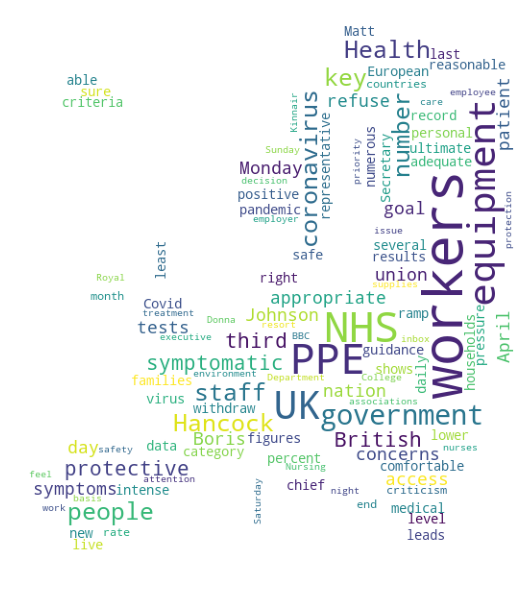

In [11]:
import numpy as np
mask_EU = np.array(Image.open(requests.get('https://blog.kkday.com/wp-content/uploads/batch_歐洲申根-1.jpg',stream=True).raw))
generate_wordcloud(text_EU, mask_EU)

From the above wordcloud, we can discover the following from CNN's point of view:


1.   "**workers**" appeared to be the most important part of the reports. 

    This may show that CNN sees the impact of COVID-19 on workers crucial. The US has experienced a tremendously increasing unemployment rate since the COVID-19 outbreak. Recently, many citizens in the US started to protest against strict social distancing policies, calling for "Let us go back for work." 
    CNN may have high interest in comparing the labor situation between Europe and the US.
2.   The size for "**NHS**", which stands for "National Health Service", is almost as large as the "**UK**". This is reasonable since NHS is the healthcare system in the UK. CNN frequently mentions NHS and UK may be due to the fact that the prime minister of the UK Borin Johnson has been tested positive for COVID-19. Hence, the world starts to pay more attention on the situation in the UK.

1.   The size for "**goverment**" and "**health**" are also similar. We may possibly infer that CNN sees government responsible for its citizens' health.

1.   The size for "**Hancock**" and "**British**" are also similar. This is reasonable since "Hancock" stands for the British Secretary of State for Health and Social Care "**Matt Hancock**".

2.   "**PPE**", which stands for Personal Protective Equipment, also takes a significant portion in our word cloud. (Look at the lower-left corner of our word cloud). In the COVID-19 pandemic, lack of PPE for Western world is noticeable, and the situation in the Europe is no exception. We can also see from the top-right cornoer of our word cloud that "**equipment**" is also highly discussed by CNN.

In conclusion, the report on the COVID-19 situation for Europe by CNN has the following features:


1.   Contents are primary focusing on the UK.
2.   Western countries care a lot about workers.

1.   PPE (such as mask, alcohal...) has been highly discussed.
2.   More noun and less adjective.










### **(2) China Case**

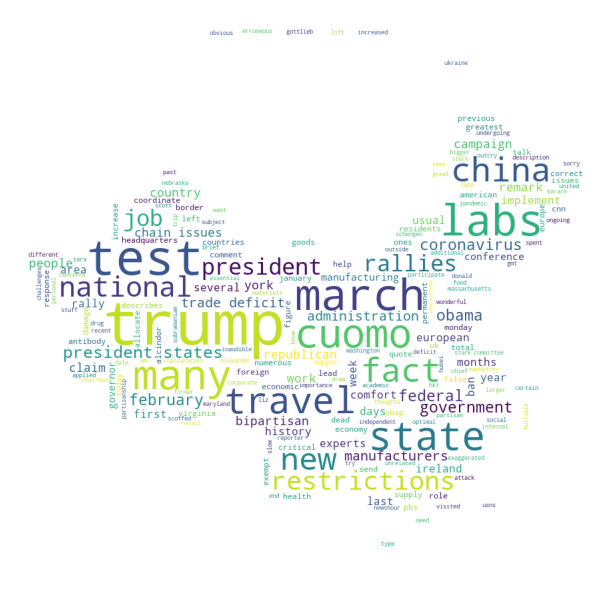

In [12]:
import numpy as np
mask_CN = np.array(Image.open(requests.get('https://www.china-briefing.com/news/wp-content/uploads/2020/02/China-Coronavirus-Factory-Re-openings-by-Province-Latest-Update.jpg',stream=True).raw))
generate_wordcloud(text_CN_new, mask_CN)

From the above wordcloud, we can discover the following from CNN's point of view:



1.   "**trump**" is the most frequently appeared term according to the word cloud. This may be owing to the fact that Donald Trump frequently mentioned issues about China. Also, since CNN is an US media, mentioning Trump frequently is reasonable. Note that "**cuomo**", which stands for the Governor of New York **Andrew Cuomo**, also occupy a big portion of our word cloud. This is reasonable since New York has experienced a major lockdown due to COVID-19. 

2.   "**test**" and "**many**" also occupy quite a portion of our word cloud. Note that in the EU case, no adjective appears to be frequently appeared, while in the China case, "many" appears. From these 2 terms, we may indicate that China has many COVID-19 tested and confirmed. Note that at the top-left corner of our word cloud, "**new**" also occupies quite a portion of our word cloud. Since many test of COVID-19 are made daily, many "new" cases shall be confirmed.

1.   "**labs**" and "**china**" also occupy quite a portion of our word cloud. Many people suspects the COVID-19 virus was leaked from a lab in Wuhan on purpose. This also catches CNN's attention.
2.   "**travel**": many travel restrictions between China and other countries has been implemented.

1.   "**fact**": people are asking China for the truth about COVID-19. 

In conclusion, the report on the COVID-19 situation for China by CNN has the following features:


1.   Contents are primary focusing on China, while some content relating to the US also appears.
2.   CNN are curios about the origin of the COVID-19. (labs, fact)

1.   "Many", being an adjective, has occupied a great portion in this case. 









### **(3) Research Paper For COVID-19**

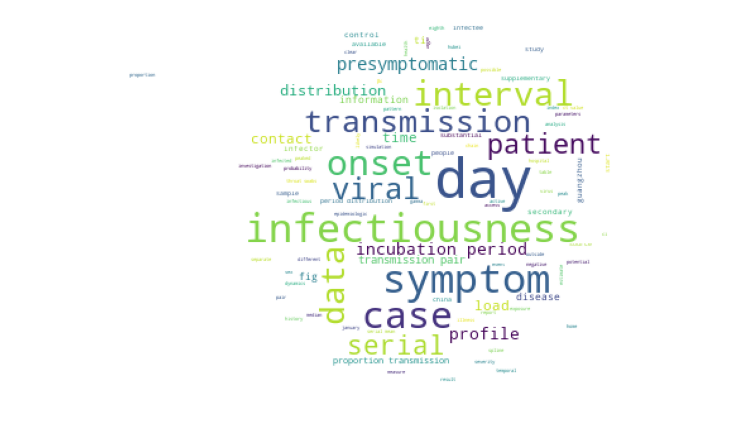

In [13]:
import numpy as np
mask_paper = np.array(Image.open(requests.get('https://www.bbvaopenmind.com/wp-content/uploads/2020/03/BBVA-OpenMind-Materia-Qué-sabe-la-ciencia-sobre-el-coronavirus-y-qué-ha-logrado-Coronovirus-3.jpg',stream=True).raw))
generate_wordcloud(text_paper, mask_paper)

From the above wordcloud, we can discover the following from the research papers for COVID-19:



1.   "**infectiousness**" of COVID-19 is being emphasized.
2.   "**day**" stands a huge portion in our word cloud. This may be owing to the essence of research. (i.e. to quantify some phenomenon). For example, the research may say that the virus can stay active for some days. 

2.   "**interval**", which stands for "**Serial Interval**", refers to the time between successive cases in a chain of transmission in the epidemiology of communicable (infectious) diseases. This is reasonable since the researches are talking about COVID-19.

1.   "**transmission**" stands a great portion in our word cloud, which is reasonable since researches may discuss about the means/routes of transmission for COVID-19. "**onset**" is also widely discussed since the researches may also want to know when a "**patient**" showed "**symptom**".
2.   "**viral**", which is an adjective, also occupy some space in our world cloud. 

In conclusion, the research papers for COVID-19 has the following features:


1.   Contents are primary focusing on infectiousness of COVID-19. 
2.   Quantity counts. (day)

1.  Transmission of COVID-19 is being emphasized.









## **Information Retrieval**

First, we construct the functions needed for information retrieval as follows:

In [0]:
# Declare all function 
# create tf function
def tf(term, token_doc):
    tf = token_doc.count(term)/len(token_doc)
    return tf

# create function to calculate how many doc contain the term 
def numDocsContaining(word, token_doclist):
    doccount = 0
    for doc_token in token_doclist:
        if doc_token.count(word) > 0:
            doccount +=1
    return doccount
  
import math
# create function to calculate  Inverse Document Frequency in doclist - this list of all documents
def idf(word, token_doclist):
    n = len(token_doclist)
    df = numDocsContaining(word, token_doclist)
    return math.log10(n/df)

#define a function to do cosine normalization a data dictionary
def cos_norm(dic): # dic is distionary data structure
  import numpy as np
  dic_norm={}
  factor=1.0/np.sqrt(sum([np.square(i) for i in dic.values()]))
  for k in dic:
    dic_norm[k] = dic[k]*factor
  return dic_norm

#create function to calculate normalize tfidf 
def compute_tfidf(token_doc,bag_words_idf):
  tfidf_doc={}
  for word in set(token_doc):
    tfidf_doc[word]= tf(word,token_doc) * bag_words_idf[word]   
  tfidf_norm = cos_norm(tfidf_doc)
  return tfidf_norm

# create normalize term frequency
def tf_norm(token_doc):
  tf_norm={}
  for term in token_doc:
    tf = token_doc.count(term)/len(token_doc)
    tf_norm[term]=tf
  tf_max = max(tf_norm.values())
  for term, value in tf_norm.items():
    tf_norm[term]= 0.5 + 0.5*value/tf_max
  return tf_norm

def compute_tfidf_query(query_token,bag_words_idf):
  tfidf_query={}
  tf_norm_query = tf_norm(query_token)
  for term, value in tf_norm_query.items():
    tfidf_query[term]=value*bag_words_idf[term]   
  return tfidf_query

### **(1) EU Case**

The query text is set as follows:

In [0]:
mydrive ="/content/drive/My Drive/Colab Notebooks/"
query_EU = open(mydrive+'EU_query.txt').read()

Next, we combine doc_all_EU to generate bag_words_EU.

Also, we calculate the idf for every word in bag_words_EU, and calculate speed of processing our code as follows:

In [16]:
import os
from datetime import datetime
from pytz import timezone
now = datetime.now(timezone('Asia/Taipei'))
start_time = now.strftime("%H:%M:%S")
print("Start tfidf processing at", start_time)

#create bag words
bag_words_EU =[] # declare bag_words is a list
for doc in doc_all_EU.keys():
  bag_words_EU += doc_all_EU[doc]
bag_words_EU=set(bag_words_EU)

#calculate idf for every word in bag_words
bag_words_idf_EU={} # declare "bag_words_idf" data structure is dictionary 
bag_words_len_EU = len(bag_words_EU)
bag_word_10_EU = round(bag_words_len_EU/10,0)
print("the number of term in bag_word", bag_words_len_EU)
print("Start idf processing")
i=0
for word in bag_words_EU:
  i+=1
  if (i%bag_word_10_EU==0):print("finish %s idf processing" %(str(round(i*10/bag_word_10_EU))+"%"))
  bag_words_idf_EU[word]= idf(word,doc_all_EU.values())

print("finish idf processing")
##calculate tfidf with cosine normalization
tfidf={} # declare tfidf dictionary to store tfidf value
for doc in doc_all_EU.keys():
  tfidf[doc]= compute_tfidf(doc_all_EU[doc],bag_words_idf_EU)
finish_time = datetime.now(timezone('Asia/Taipei')).strftime("%H:%M:%S")
print("finish tfidf processing at", finish_time)

Start tfidf processing at 16:52:06
the number of term in bag_word 2170
Start idf processing
finish 10% idf processing
finish 20% idf processing
finish 30% idf processing
finish 40% idf processing
finish 50% idf processing
finish 60% idf processing
finish 70% idf processing
finish 80% idf processing
finish 90% idf processing
finish 100% idf processing
finish idf processing
finish tfidf processing at 16:52:06


After that, we tokenize and convert our query text into a vector, and find out  **the top 10 news relevant to our query text**:

In [17]:
query_token_raw= nltk.word_tokenize(query_EU)
query_token = [term for term in query_token_raw if term in bag_words_EU]


tfidf_query =compute_tfidf_query(query_token,bag_words_idf_EU) #calculate tfidf for query text

# add tfidf of query text to tfidf of all doc and convert to dataframe
tfidf["query"]=tfidf_query

import pandas as pd
tfidf_df = pd.DataFrame(tfidf).transpose()
tfidf_df= tfidf_df.fillna(0) # replace all NaN by zero

from scipy.spatial.distance import cosine
cosine_sim ={}
for row in tfidf_df.index:
  if row != "query":
    cosine_sim[row]= 1-cosine(tfidf_df.loc[row],tfidf_df.loc["query"])

# the top 10 relevant document
cosine_sim_top10 = dict(sorted(cosine_sim.items(), key=lambda item: item[1],reverse=True)[:10])
print(cosine_sim_top10)

{"0416_As governments fumbled their coronavirus response, these four got it right. Here's how.": 0.23916211377345442, '0416_Women leaders are doing a disproportionately great job at handling the pandemic.': 0.03464653827714592, '0415_Italy aims to turn suffering to advantage with experimental Covid-19 treatment': 0.02195432667302144, "0416_France's Macron positioning himself as leader of the world": 0.017986726342938186, "0418_Spain's coronavirus death toll rises to over 20,000": 0.015003144166337634, "0415_Prince George's godfather, billionaire Duke of Westminster, gave $15.6M to UK coronavirus relief charities": 0.013452748840796835, '0419_Johnson missed 5 key coronavirus meetings, but UK government defends his leadership': 0.012252184235208685, '0416_The Spanish flu killed more than 50 million people. These lessons could help avoid a repeat with coronavirus': 0.010916930160778326, "0417_Images of Venice from space show how coronavirus has changed the city's iconic canals": 0.0088337

Finally, we display our query result (the relevant news we can extract using query text) via a barchart as follows:

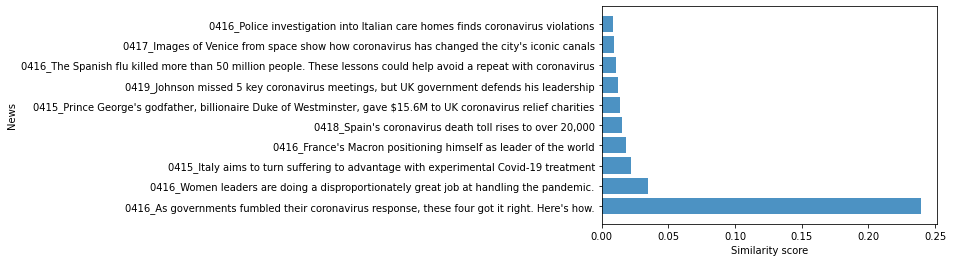

In [18]:
#plot barchart
import matplotlib.pyplot as plt
data = cosine_sim_top10
plt.barh(range(len(data)), list(data.values()), align='center', alpha=0.8)
plt.yticks(range(len(data)), list(data.keys())) # label for y axis
plt.xlabel('Similarity score')
plt.ylabel('News')

# save graph
plt.savefig(mydrive+"barchart.png", bbox_inches='tight', dpi=600)
plt.show()

### **(2) China Case**

The query text is set as follows:

In [0]:
mydrive ="/content/drive/My Drive/Colab Notebooks/"
query_CN = open(mydrive+'China_query.txt').read()

Next, we combine doc_all_CN to generate bag_words_CN.

Also, we calculate the idf for every word in bag_words_CN, and calculate speed of processing our code as follows:

In [20]:
import os
from datetime import datetime
from pytz import timezone
now = datetime.now(timezone('Asia/Taipei'))
start_time = now.strftime("%H:%M:%S")
print("Start tfidf processing at", start_time)

#create bag words
bag_words_CN  =[] # declare bag_words is a list
for doc in doc_all_CN.keys():
  bag_words_CN += doc_all_CN[doc]
bag_words_CN=set(bag_words_CN)

#calculate idf for every word in bag_words
bag_words_idf_CN={} # declare "bag_words_idf" data structure is dictionary 
bag_words_len_CN = len(bag_words_CN)
bag_word_10_CN = round(bag_words_len_CN/10,0)
print("the number of term in bag_word", bag_words_len_CN)
print("Start idf processing")
i=0
for word in bag_words_CN:
  i+=1
  if (i%bag_word_10_CN==0):print("finish %s idf processing" %(str(round(i*10/bag_word_10_CN))+"%"))
  bag_words_idf_CN[word]= idf(word,doc_all_CN.values())

print("finish idf processing")
##calculate tfidf with cosine normalization
tfidf={} # declare tfidf dictionary to store tfidf value
for doc in doc_all_CN.keys():
  tfidf[doc]= compute_tfidf(doc_all_CN[doc],bag_words_idf_CN)
finish_time = datetime.now(timezone('Asia/Taipei')).strftime("%H:%M:%S")
print("finish tfidf processing at", finish_time)

Start tfidf processing at 16:52:38
the number of term in bag_word 2856
Start idf processing
finish 10% idf processing
finish 20% idf processing
finish 30% idf processing
finish 40% idf processing
finish 50% idf processing
finish 60% idf processing
finish 70% idf processing
finish 80% idf processing
finish 90% idf processing
finish idf processing
finish tfidf processing at 16:52:38


After that, we tokenize and convert our query text into a vector, and find out  **the top 10 news relevant to our query text**:

In [21]:
query_token_raw_CN= nltk.word_tokenize(query_CN)
query_token_CN = [term for term in query_token_raw_CN if term in bag_words_CN]


tfidf_query_CN =compute_tfidf_query(query_token_CN,bag_words_idf_CN) #calculate tfidf for query text

# add tfidf of query text to tfidf of all doc and convert to dataframe
tfidf["query"]=tfidf_query_CN

import pandas as pd
tfidf_df = pd.DataFrame(tfidf).transpose()
tfidf_df= tfidf_df.fillna(0) # replace all NaN by zero

from scipy.spatial.distance import cosine
cosine_sim ={}
for row in tfidf_df.index:
  if row != "query":
    cosine_sim[row]= 1-cosine(tfidf_df.loc[row],tfidf_df.loc["query"])

# the top 10 relevant document
cosine_sim_top10_CN = dict(sorted(cosine_sim.items(), key=lambda item: item[1],reverse=True)[:10])
print(cosine_sim_top10_CN)

{"0415_WHO says it regrets Trump's decision to halt funding, but remains focused on coronavirus response": 0.11175277362338665, '0416_The US is halting funding to the WHO. What does this actually mean': 0.060106720312992246, "0419_Trump is frustrated and 'chomping at the bit' to reopen America and the economy": 0.041129799020938496, "0419_Trump counters governors' pleas for help 'Testing is a local thing'": 0.03304690413448386, '0420_On Sunday, Trump takes no break from repeating false virus claims': 0.022938223431524296, '0416_Fact check Trump repeats false claim he has power over state coronavirus restrictions, threatens to shut down Congress': 0.02048906536478423, '0408_National security officials warn of extremists exploiting coronavirus pandemic': 0.016004853041629574, '0414_Beijing faces a diplomatic crisis after reports of mistreatment of Africans in China causes outrage': 0.014107971911431427, '0419_Trump lashes out at governors over testing shortfalls': 0.008775595304715278, '

Finally, we display our query result (the relevant news we can extract using query text) via a barchart as follows:

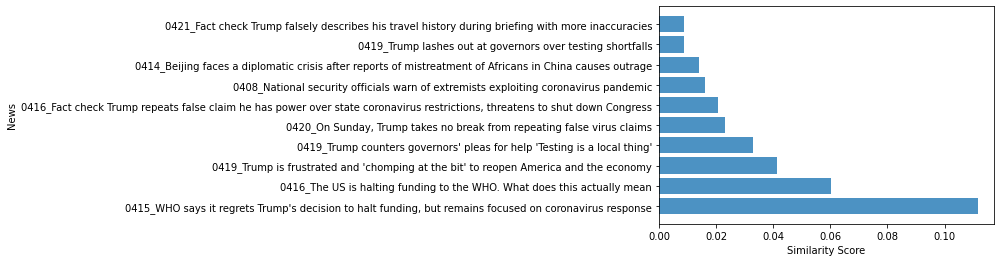

In [22]:
#plot barchart
import matplotlib.pyplot as plt
data = cosine_sim_top10_CN
plt.barh(range(len(data)), list(data.values()), align='center', alpha=0.8)
plt.yticks(range(len(data)), list(data.keys())) # label for y axis
plt.xlabel('Similarity Score')
plt.ylabel('News')

# save graph
plt.savefig(mydrive+"barchart.png", bbox_inches='tight', dpi=600)
plt.show()

### **(3) Research Paper For COVID-19**

The query text is set as follows:

In [0]:
mydrive ="/content/drive/My Drive/Colab Notebooks/"
query_p = open(mydrive+'research.txt').read()

Next, we combine doc_all_paper to generate bag_words_paper.

Also, we calculate the idf for every word in bag_words_paper, and calculate speed of processing our code as follows:

In [24]:
import os
from datetime import datetime
from pytz import timezone
now = datetime.now(timezone('Asia/Taipei'))
start_time = now.strftime("%H:%M:%S")
print("Start tfidf processing at", start_time)

#create bag words
bag_words_paper  =[] # declare bag_words is a list
for doc in doc_all_paper.keys():
  bag_words_paper += doc_all_paper[doc]
bag_words_paper=set(bag_words_paper)

#calculate idf for every word in bag_words
bag_words_idf_paper={} # declare "bag_words_idf" data structure is dictionary 
bag_words_len_paper = len(bag_words_paper)
bag_word_10_paper = round(bag_words_len_paper/10,0)
print("the number of term in bag_word", bag_words_len_paper)
print("Start idf processing")
i=0
for word in bag_words_paper:
  i+=1
  if (i%bag_word_10_paper==0):print("finish %s idf processing" %(str(round(i*10/bag_word_10_paper))+"%"))
  bag_words_idf_paper[word]= idf(word,doc_all_paper.values())

print("finish idf processing")
##calculate tfidf with cosine normalization
tfidf={} # declare tfidf dictionary to store tfidf value
for doc in doc_all_paper.keys():
  tfidf[doc]= compute_tfidf(doc_all_paper[doc],bag_words_idf_paper)
finish_time = datetime.now(timezone('Asia/Taipei')).strftime("%H:%M:%S")
print("finish tfidf processing at", finish_time)

Start tfidf processing at 16:52:59
the number of term in bag_word 2393
Start idf processing
finish 10% idf processing
finish 20% idf processing
finish 30% idf processing
finish 40% idf processing
finish 50% idf processing
finish 60% idf processing
finish 70% idf processing
finish 80% idf processing
finish 90% idf processing
finish 100% idf processing
finish idf processing
finish tfidf processing at 16:52:59


After that, we tokenize and convert our query text into a vector, and find out  **the top 10 research papers relevant to our query text**:

In [25]:
query_token_raw_paper= nltk.word_tokenize(query_p)
query_token_paper = [term for term in query_token_raw_paper if term in bag_words_paper]


tfidf_query_paper =compute_tfidf_query(query_token_paper,bag_words_idf_paper) #calculate tfidf for query text

# add tfidf of query text to tfidf of all doc and convert to dataframe
tfidf["query"]=tfidf_query_paper

import pandas as pd
tfidf_df = pd.DataFrame(tfidf).transpose()
tfidf_df= tfidf_df.fillna(0) # replace all NaN by zero

from scipy.spatial.distance import cosine
cosine_sim ={}
for row in tfidf_df.index:
  if row != "query":
    cosine_sim[row]= 1-cosine(tfidf_df.loc[row],tfidf_df.loc["query"])

# the top 10 relevant document
cosine_sim_top10_paper = dict(sorted(cosine_sim.items(), key=lambda item: item[1],reverse=True)[:10])
print(cosine_sim_top10_paper)

{'0305 COVID-19 and the cardiovascular system': 0.2207793030624554, '0218 Pathological findings of COVID-19 associated with acute respiratory distress syndrome': 0.2149328196313196, '0316 Clinical features of pediatric patients with COVID-19 a report of two family cluster cases ': 0.19578682698338334, '0316 COVID-19 consider cytokine storm syndromes and immunosuppression': 0.18916751002737886, '0325 COVID-19 faecal–oral transmission': 0.1823914101838895, '0415 Temporal dynamics in viral shedding and transmissibility of COVID-19': 0.166528038030467, '0323 Insights from nanomedicine into chloroquine efficacy against COVID-19': 0.1596473937436399, '0411 Pathological findings of COVID-19 associated with acute respiratory distress syndrome': 0.15578691335766137, '0319 Functional exhaustion of antiviral lymphocytes in COVID-19 patients': 0.14137143019045606, '0316 Breadth of concomitant immune responses prior to patient recovery a case report of non-severe COVID-19': 0.11072357059212246}


Finally, we display our query result (the relevant research papers we can extract using query text) via a barchart as follows:

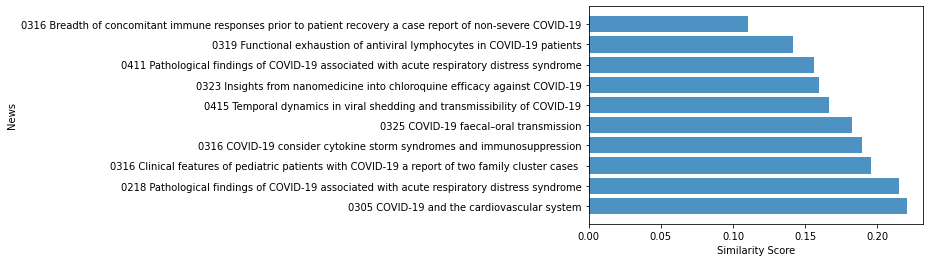

In [27]:
#plot barchart
import matplotlib.pyplot as plt
data = cosine_sim_top10_paper
plt.barh(range(len(data)), list(data.values()), align='center', alpha=0.8)
plt.yticks(range(len(data)), list(data.keys())) # label for y axis
plt.xlabel('Similarity Score')
plt.ylabel('News')

# save graph
plt.savefig(mydrive+"barchart.png", bbox_inches='tight', dpi=600)
plt.show()